Import libraries

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob
from lxml import etree

Display files in dataset

In [6]:
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset\image\0.jpg
./dataset\image\1.jpg
./dataset\image\10.jpg
./dataset\image\100.jpg
./dataset\image\101.jpg
./dataset\image\102.jpg
./dataset\image\103.jpg
./dataset\image\104.jpg
./dataset\image\105.jpg
./dataset\image\106.jpg
./dataset\image\107.jpg
./dataset\image\108.jpg
./dataset\image\109.jpg
./dataset\image\11.jpg
./dataset\image\110.jpg
./dataset\image\111.jpg
./dataset\image\112.jpg
./dataset\image\113.jpg
./dataset\image\114.jpg
./dataset\image\115.jpg
./dataset\image\116.jpg
./dataset\image\117.jpg
./dataset\image\118.jpg
./dataset\image\119.jpg
./dataset\image\12.jpg
./dataset\image\120.jpg
./dataset\image\121.jpg
./dataset\image\122.jpg
./dataset\image\123.jpg
./dataset\image\124.jpg
./dataset\image\125.jpg
./dataset\image\126.jpg
./dataset\image\127.jpg
./dataset\image\128.jpg
./dataset\image\129.jpg
./dataset\image\13.jpg
./dataset\image\130.jpg
./dataset\image\131.jpg
./dataset\image\132.jpg
./dataset\image\133.jpg
./dataset\image\134.jpg
./dataset\image\135.jpg


In [7]:
IMG_SIZE = 224

In [8]:
# Directory of all images
img_dir = "./dataset/image"
data_path = os.path.join(img_dir, '*jpg')
files = glob.glob(data_path)

# We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
files.sort()
X = []

for file in files:
    image = cv2.imread(file)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    X.append(np.array(image))

We create the variable y containing all the bounding boxe annotations (label). Before that, we will have to resize the annotations so that it fits the new size of the images (200*200). We create a function resizeannotation for that.

In [10]:
def resize_annotation(file):
    tree = etree.parse(file)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMG_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMG_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMG_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMG_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [11]:
path = "./dataset/label_xml"
xml_files = ['./dataset/label_xml/' + f for f in sorted(os.listdir(path))]
y = []
for file in xml_files:
    y.append(resize_annotation(file))

In [14]:
resize_annotation("./dataset/label_xml/20.xml")

[91, 54, 66, 47]

Check X and y shape

In [17]:
np.array(X).shape

(388, 224, 224, 3)

In [18]:
np.array(y).shape

(452, 4)

### TODO: We should to filter xml files

Display first fifteen image of the dataset

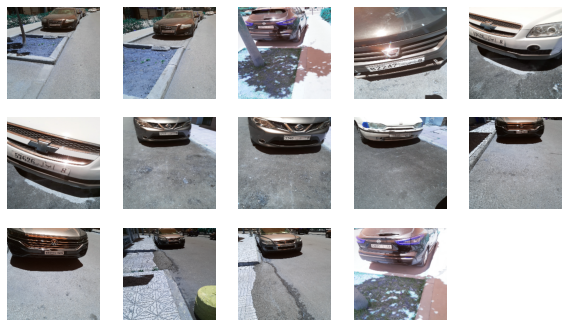

In [19]:
plt.figure(figsize=(10, 20))
for i in range(0, 14):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(X[i])

We can draw the rectangle containing the license plate using the OpenCV library

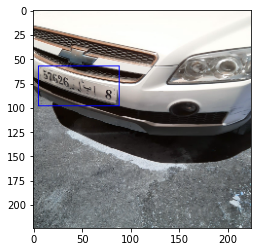

In [22]:
# Example with the first image of the dataset
image = cv2.rectangle(X[4], (y[4][0], y[4][1]), (y[4][2], y[4][3]), (0, 0, 255))
plt.imshow(image)
plt.show()